# Importing Libraries for operation

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive
from sklearn.metrics import confusion_matrix,classification_report  
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas_profiling  as pp

#values to finetune hyperparametrs of Logistic Regression
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
values = np.array(range(1,101))

In [128]:
data=pd.read_csv(r"C:\Users\LENOVO\Desktop\New folder\bank-full.csv")

In [132]:
data_sub = data[['age','job','marital','education','default','housing','loan','y']]

In [139]:
data_sub[(data_sub.job=='management')&(data_sub.education=='tertiary')].y.value_counts()

no     6667
yes    1134
Name: y, dtype: int64

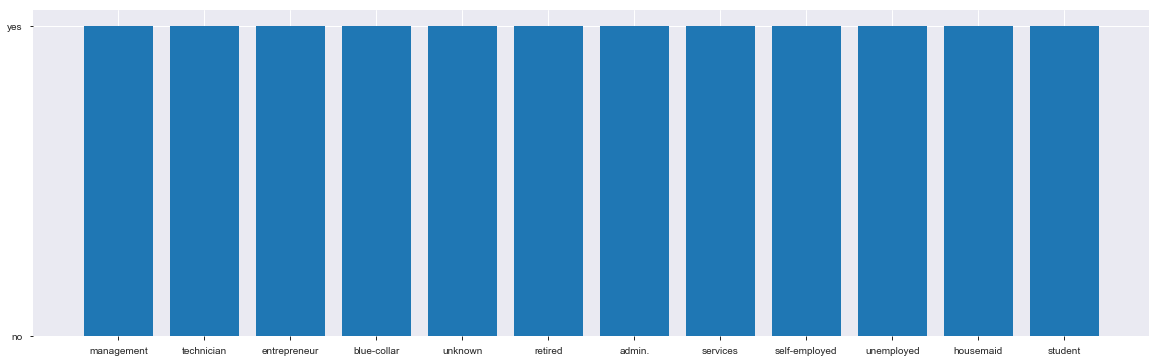

In [157]:
plt.bar(data_sub.job,ldata_sub.y)
plt.gcf().set_size_inches(20,6)
plt.show()

In [140]:
data_sub.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [138]:
5289/len(data_sub)

0.11698480458295547

In [147]:
data_sub[(data_sub.job=='admin.')&(data_sub.education=='secondary')].y.value_counts()

no     3717
yes     502
Name: y, dtype: int64

In [148]:
502/len(data_sub)

0.011103492512884033

In [6]:
data.keys()


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Performing data pre-processing

In [7]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
#extracting feature data
X=data.drop(['y'],axis=1)

In [9]:
#extracting class prediction data
y=data['y']

In [10]:
y.shape

(45211,)

In [11]:
#checking null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
#encoding default column
labelencoder=LabelEncoder()
X['default']=labelencoder.fit_transform(X['default'])

In [13]:
#encoding eduction column
X['education'].unique()
#education={'tertiary':3,'primary':1,'secondary':2,'unknown':0}
#here the problem in encoding is assigning particular values
#X.replace(education,inplace=True)
X=pd.get_dummies(X,columns=['education'])
X=X.drop(['education_unknown'],axis=1)

In [14]:
#processing the housing column
X['housing']=labelencoder.fit_transform(X['housing'])
X.housing.unique()

array([1, 0], dtype=int64)

In [15]:
X['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [16]:
#processing job column

In [17]:
X=pd.get_dummies(X,columns=['job'])

In [18]:
X=X.drop(['job_unknown'],axis=1)

In [19]:
X

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,married,0,2143,1,no,unknown,5,may,261,...,0,0,0,1,0,0,0,0,0,0
1,44,single,0,29,1,no,unknown,5,may,151,...,0,0,0,0,0,0,0,0,1,0
2,33,married,0,2,1,yes,unknown,5,may,76,...,0,1,0,0,0,0,0,0,0,0
3,47,married,0,1506,1,no,unknown,5,may,92,...,1,0,0,0,0,0,0,0,0,0
4,33,single,0,1,0,no,unknown,5,may,198,...,0,0,0,0,0,0,0,0,0,0
5,35,married,0,231,1,no,unknown,5,may,139,...,0,0,0,1,0,0,0,0,0,0
6,28,single,0,447,1,yes,unknown,5,may,217,...,0,0,0,1,0,0,0,0,0,0
7,42,divorced,1,2,1,no,unknown,5,may,380,...,0,1,0,0,0,0,0,0,0,0
8,58,married,0,121,1,no,unknown,5,may,50,...,0,0,0,0,1,0,0,0,0,0
9,43,single,0,593,1,no,unknown,5,may,55,...,0,0,0,0,0,0,0,0,1,0


In [20]:
#processing contact and poutcome

In [21]:
X=pd.get_dummies(X,columns=['poutcome','contact'])
X=X.drop(['contact_unknown','poutcome_unknown'],axis=1)

In [22]:
X.keys()

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous',
       'education_primary', 'education_secondary', 'education_tertiary',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'contact_cellular',
       'contact_telephone'],
      dtype='object')

In [23]:
#processing maritial
X=pd.get_dummies(X,columns=['marital'])

In [24]:
X=X.drop(['marital_single'],axis=1)
X.keys()

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'education_primary',
       'education_secondary', 'education_tertiary', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'contact_cellular',
       'contact_telephone', 'marital_divorced', 'marital_married'],
      dtype='object')

In [25]:
X=X.drop(['month'],axis=1)

In [26]:
#processing loan
loan={'yes':1,'no':0}
X.replace(loan,inplace=True)

In [27]:
X.shape

(45211, 31)

# Logistic Regression Model

In [28]:
model=LogisticRegression()

In [29]:
#creating scalar model 
MMScalar=MinMaxScaler()

In [30]:
X.keys()

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'education_primary',
       'education_secondary', 'education_tertiary', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'contact_cellular',
       'contact_telephone', 'marital_divorced', 'marital_married'],
      dtype='object')

In [31]:
#splitting the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.3)

In [32]:
X_train=MMScalar.fit_transform(X_train)
X_test=MMScalar.transform(X_test)
model.fit(X_train,Y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
model.score(X_test,Y_test)

0.9009141846063108

In [34]:
model.score(X_train,Y_train)

0.8999905204284766

# Data Shuffle & GridSearchCV operation

In [35]:
X_shuffle,Y_shuffle=shuffle(X,y,random_state=7)

In [36]:
params={'C':[0.0098]}
model=GridSearchCV(LogisticRegression(),params,n_jobs=-1,cv=5)
model.fit(X_shuffle,Y_shuffle)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={'C': [0.0098]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
model.best_score_

0.8974807015991684

In [38]:
model.best_params_

{'C': 0.0098}

In [39]:
#Confusion Matrix

In [40]:
y_pred_log=model.predict(X_test)

In [41]:
print(confusion_matrix(Y_test,y_pred_log))

[[11925    52]
 [ 1431   156]]


In [42]:
#Classification Report
lr=classification_report(Y_test,y_pred_log,labels=['yes','no'],output_dict=True)
lr_d=pd.DataFrame(lr)
lr_transpose=lr_d.T

# Classification report(LR)

In [43]:
lr_transpose.drop(['micro avg','macro avg','weighted avg'],axis=0)

,f1-score,precision,recall,support
yes,0.173816,0.750000,0.098299,1587.0
no,0.941460,0.892857,0.995658,11977.0


# KNN Classifier

In [44]:
params={'n_neighbors':[18]}
model2 = GridSearchCV(KNeighborsClassifier(),params,cv=5,n_jobs=-1)
model2.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [18]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [45]:
model2.best_score_

0.8889942174613708

In [46]:
model2.best_params_

{'n_neighbors': 18}

In [47]:
y_pred_log=model2.predict(X_test)

In [48]:
print(confusion_matrix(Y_test,y_pred_log))

[[11894    83]
 [ 1380   207]]


In [49]:
print(classification_report(Y_test,y_pred_log,labels=['no','yes'],output_dict=False))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     11977
         yes       0.71      0.13      0.22      1587

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.80      0.56      0.58     13564
weighted avg       0.87      0.89      0.86     13564



In [50]:
knn=classification_report(Y_test,y_pred_log,labels=['yes','no'],output_dict=True)
knn_d=pd.DataFrame(knn)
knn_transpose=knn_d.T

# Classification Report (KNN)

In [51]:
knn_transpose.drop(['micro avg','macro avg','weighted avg'],axis=0)

,f1-score,precision,recall,support
yes,0.220565,0.713793,0.130435,1587.0
no,0.942062,0.896037,0.993070,11977.0


# Decision Tree Classification

In [52]:
params ={'max_depth': [3],
        'min_samples_leaf':  [1]}
model3 = GridSearchCV(DecisionTreeClassifier(random_state=7),params,cv=5,n_jobs=-1)
model3.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3], 'min_samples_leaf': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
np.unique(model3.predict(X_test), return_counts=True)

(array(['no', 'yes'], dtype=object), array([12721,   843], dtype=int64))

In [54]:
model3.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [55]:
model3.best_score_

0.8996429361392865

In [56]:
y_pred_log=model3.predict(X_test)


In [57]:
#Confusion Matrix
y_pred_dec=model3.predict(X_test)
print(confusion_matrix(Y_test,y_pred_dec))
Y_test.value_counts()

[[11677   300]
 [ 1044   543]]


no     11977
yes     1587
Name: y, dtype: int64

In [58]:
Y_train.value_counts()

no     27945
yes     3702
Name: y, dtype: int64

In [59]:
#Classification Report
dt=classification_report(Y_test,y_pred_log,labels=['yes','no'],output_dict=True)

In [60]:
dt_d=pd.DataFrame(dt)

In [61]:
dt_d

,yes,no,micro avg,macro avg,weighted avg
f1-score,0.446914,0.945583,0.900914,0.696248,0.887238
precision,0.644128,0.917931,0.900914,0.781030,0.885896
recall,0.342155,0.974952,0.900914,0.658554,0.900914
support,1587.000000,11977.000000,13564.000000,13564.000000,13564.000000


In [62]:
dt_transpose=dt_d.T

# Classification Report (DCT)

In [63]:
dt_transpose.drop(['micro avg','macro avg','weighted avg'],axis=0)

,f1-score,precision,recall,support
yes,0.446914,0.644128,0.342155,1587.0
no,0.945583,0.917931,0.974952,11977.0


# Plotting Decision Tree

In [64]:
model4=DecisionTreeClassifier(random_state=7,max_depth=3,min_samples_leaf=1)
model4.fit(X_train,Y_train)
graph = Source(export_graphviz(model4, out_file=None
   , feature_names=X.keys(), class_names=['yes','no'] 
   ))

In [1]:
#display(SVG(graph.pipe(format='svg')))

In [66]:
model5=LinearSVC()

In [67]:
model5.fit(X_train,Y_train)
model5.predict(X_train)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [68]:
model5.score(X_test,Y_test)

0.9003243880861103

In [69]:
params={}
model6=GridSearchCV(LinearSVC(random_state=7),params,cv=5,n_jobs=-1)


In [70]:
model6.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=7, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
model6.best_score_

0.898758176130439

In [72]:
#Confusion Matrix
y_pred_log=model6.predict(X_test)
print(confusion_matrix(Y_test,y_pred_log))

[[11752   225]
 [ 1127   460]]


In [73]:
#Classification Report
sv=classification_report(Y_test,y_pred_log,labels=['yes','no'],output_dict=True)

In [74]:
sv_d=pd.DataFrame(sv)

In [75]:
sv_d_transpose=sv_d.transpose()

# Classification Report (SVC)

In [76]:
sv_d_transpose.drop(['micro avg','macro avg','weighted avg'],axis=0)

,f1-score,precision,recall,support
yes,0.404930,0.671533,0.289855,1587.0
no,0.945607,0.912493,0.981214,11977.0


# Creating tables

In [102]:
X_n=X
X_n.drop(['pdays'],axis=1)

,age,default,balance,housing,loan,day,duration,campaign,previous,education_primary,...,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_other,poutcome_success,contact_cellular,contact_telephone,marital_divorced,marital_married
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,33,0,2,1,1,5,76,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,35,0,231,1,0,5,139,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,28,0,447,1,1,5,217,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,42,1,2,1,0,5,380,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,58,0,121,1,0,5,50,1,0,1,...,0,0,0,0,0,0,0,0,0,1
9,43,0,593,1,0,5,55,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [114]:
data=data.drop(['age'],axis=1)


l=[]
for x in data.columns:
    l.append(data['{}'.format(x)])
 


In [116]:
l

[0           management
 1           technician
 2         entrepreneur
 3          blue-collar
 4              unknown
 5           management
 6           management
 7         entrepreneur
 8              retired
 9           technician
 10              admin.
 11              admin.
 12          technician
 13          technician
 14            services
 15             retired
 16              admin.
 17         blue-collar
 18             retired
 19            services
 20         blue-collar
 21          management
 22         blue-collar
 23            services
 24             retired
 25              admin.
 26          management
 27        entrepreneur
 28          management
 29          technician
              ...      
 45181      blue-collar
 45182       technician
 45183          retired
 45184          retired
 45185         services
 45186          unknown
 45187         services
 45188       management
 45189         services
 45190      blue-collar
 45191          

In [115]:
pd.crosstab(l,data.y,margins=True)


y                                                                                                                 no  \
job     marital  education default balance housing loan contact   day duration campaign previous poutcome y            
admin.  divorced primary   no      -347    yes     no   unknown   26  200      2        0        unknown  no       1   
                                   0       no      no   unknown   6   127      1        0        unknown  no       1   
                                                   yes  cellular  10  542      1        0        unknown  no       1   
                                           yes     no   cellular  29  604      3        0        unknown  no       1   
                                   1       no      no   unknown   15  17       10       0        unknown  no       1   
                                   50      yes     yes  cellular  23  379      1        0        unknown  no       1   
                                   112     yes     no   cellular  13  79       1        0        unknown  no       1   
                                   179     yes     no   cellular  15  67       1        2        failure  no       1   
                                                        unknown   12  306      2        0        unknown  no       1   
                                   191     yes     no   cellular  5   252      1        0        unknown  no       1   
                                   207     yes     no   cellular  16  284      1        4        failure  no       1   
                                                        unknown   3   88       4        0        unknown  no       1   
                                   227     no      no   cellular  9   185      1        0        unknown  no       1   
                                   357     yes     yes  unknown   15  134      1        0        unknown  no       1   
                                   429     yes     no   cellular  22  147      1        1        success  yes      0   
                                                                  26  465      2        2        success  yes      0   
                                                        telephone 23  80       1        0        unknown  yes      0   
                                   505     no      yes  cellular  18  119      4        0        unknown  no       1   
                                   509     no      no   cellular  17  272      1        0        unknown  no       1   
                                   628     yes     yes  unknown   14  191      1        0        unknown  no       1   
                                   987     no      no   unknown   16  295      2        0        unknown  no       1   
                                   1032    yes     no   unknown   29  52       5        0        unknown  no       1   
                                   1095    yes     no   cellular  18  171      1        2        other    no       1   
                                   1127    yes     no   cellular  17  625      3        0        unknown  no       1   
                                   1416    yes     no   unknown   2   239      4        0        unknown  no       1   
                                   1807    yes     no   cellular  11  62       3        2        failure  no       1   
                                                        unknown   6   118      2        0        unknown  no       1   
                                   4070    yes     no   unknown   6   140      2        0        unknown  no       1   
                                   8583    yes     no   cellular  19  59       1        0        unknown  no       1   
                                   9569    yes     no   unknown   9   43       2        0        unknown  no       1   
...                                                                                                              ...   
unknown single   tertiary  no      2918 

In [2]:
#pp.ProfileReport(data)

In [80]:
classifiers=[("knn",KNeighborsClassifier()),
 ("log",LogisticRegression()),
 ("LinearSVC",LinearSVC()),
  ("dtt",DecisionTreeClassifier())    
]

In [81]:
classifier = VotingClassifier(estimators=classifiers,n_jobs=1)
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8994396933058095

# Implementing Bagging Classsifier

In [82]:
dc=DecisionTreeClassifier(random_state=7,min_samples_leaf=1,max_depth=3)

In [83]:
bag=BaggingClassifier(base_estimator=dc,n_estimators=500)

In [84]:
bag.fit(X_train,Y_train)
bag.score(X_test,Y_test)

0.901135358301386

In [85]:
y_predict_bag=bag.predict(X_test)
print(confusion_matrix(Y_test,y_predict_bag))

[[11691   286]
 [ 1055   532]]


In [86]:
print(classification_report(Y_test,y_predict_bag,labels=['yes','no']))

              precision    recall  f1-score   support

         yes       0.65      0.34      0.44      1587
          no       0.92      0.98      0.95     11977

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.89      0.90      0.89     13564



# Implementing Random forest Classifiers

In [87]:
rf=RandomForestClassifier(n_jobs=-1,random_state=7,n_estimators=500)

In [88]:
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.901061633736361

In [89]:
Y_predict_n=rf.predict(X_test)
print(confusion_matrix(Y_test,Y_predict_n))

[[11667   310]
 [ 1032   555]]


In [90]:
print(classification_report(Y_test,Y_predict_n,labels=['yes','no']))

              precision    recall  f1-score   support

         yes       0.64      0.35      0.45      1587
          no       0.92      0.97      0.95     11977

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



# implementing ADA Boosting

In [91]:
abc=AdaBoostClassifier(n_estimators=500,random_state=7)
abc.fit(X_train,Y_train)
abc.score(X_test,Y_test)

0.8987761722205839

In [92]:
Y_predict_n2=abc.predict(X_test)
print(confusion_matrix(Y_test,Y_predict_n2))

[[11612   365]
 [ 1008   579]]


In [93]:
print(classification_report(Y_test,Y_predict_n2,labels=['yes','no']))

              precision    recall  f1-score   support

         yes       0.61      0.36      0.46      1587
          no       0.92      0.97      0.94     11977

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



In [94]:
X.shape

(45211, 31)

In [95]:
pd.crosstab

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)>